In [201]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
complaints_data = pd.read_csv('complaints.csv')
complaints_data.head(3)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN


### Finding the number of complaints by product and showing the results in both raw data and a graphical representation.

In [203]:
product = complaints_data['Product'].value_counts()
product

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
Name: Product, dtype: int64

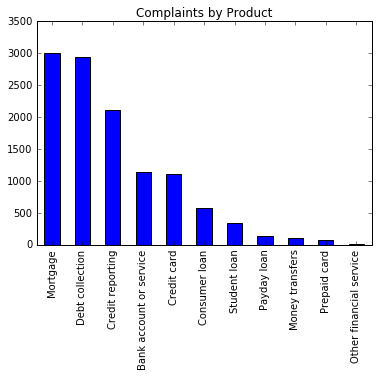

In [221]:
product.plot(kind='bar', color='blue', title='Complaints by Product')

### Finding the number of complaints by company.  The raw data and graphical representation show only the top 10 companies.

In [224]:
top_companies = complaints_data['Company'].value_counts().head(10)
top_companies

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
Name: Company, dtype: int64

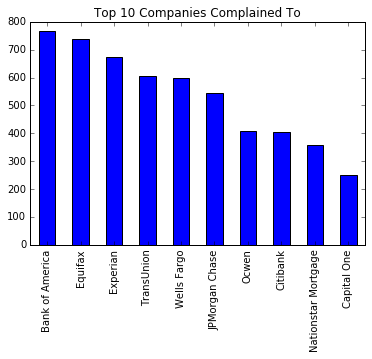

In [226]:
top_companies.plot(kind='bar', color='blue', title='Top 10 Companies Complained To')

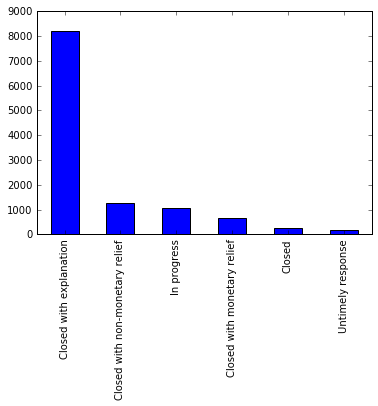

In [206]:
company_response = complaints_data['Company response'].value_counts()
company_response.plot(kind='bar', color='blue')

In [213]:
complaints_data['Date sent to company'] =  pd.to_datetime(complaints_data['Date sent to company'])

In [214]:
complaints_data['weekday'] = complaints_data['Date sent to company'].dt.weekday_name

In [215]:
complaints_data.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,weekday
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,2014-12-31,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,Wednesday
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,2014-12-31,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,Wednesday
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,2014-12-31,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,Wednesday
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,2014-12-31,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,Wednesday
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,2014-12-31,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,Wednesday


In [216]:
complaints_data['weekday'].value_counts()

Monday       2609
Wednesday    2540
Tuesday      2450
Friday       1742
Thursday     1449
Saturday      429
Sunday        324
Name: weekday, dtype: int64

In [218]:
my_mean = complaints_data.groupby(['weekday', 'Date sent to company']).size().groupby(level=0).mean()
my_mean

weekday
Friday       217.750
Monday       326.125
Saturday      85.800
Sunday        81.000
Thursday     181.125
Tuesday      306.250
Wednesday    317.500
dtype: float64

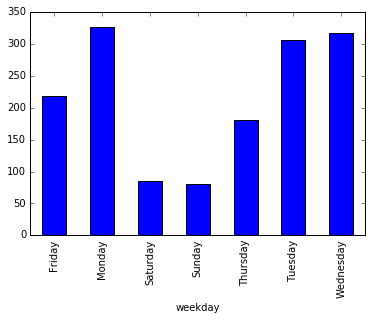

In [219]:
my_mean.plot(kind='bar', color='blue')